#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [4]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [23]:
beta=2.0
p=52
t=53
spacing=beta**(p+1-t)
print("spacing: ", spacing)
x=2.0**52
y=x+spacing
print(x,y)
z=x+0.5
print(x,z)
q=y+0.5
print(y,q)

spacing:  1.0
4503599627370496.0 4503599627370497.0
4503599627370496.0 4503599627370496.0
4503599627370497.0 4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [30]:
beta=2.0
t=53
u=1023
l=-1022
quantity=2*(beta**t-beta**(t-1))*(u-l+1)+1
print(quantity)

1.842872967520007e+19


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [48]:
beta=2.0
p=0
t=53
spacing=beta**(p+1-t)
print(spacing)

print(1+spacing)
print(1+spacing/2)

2.220446049250313e-16
1.0000000000000002
1.0


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [81]:
import numpy as np
arr=np.full((10),0.1)
print(arr)

sum1 = 0
for i in arr:
    sum1 += i
print(sum1)

sum2 = np.sum(arr)
print(sum2)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
0.9999999999999999
1.0
0.10


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [68]:
a=1.234567890123400e+15
b=-1.234567890123401e+15
c=0.06
res1=a+b+c
res2=a+c+b
res3=b+c+a
print(res1,res2,res3) # res1 is the only correct result

-0.94 -1.0 -1.0


In [74]:
a=a=0.23371258e-4
b=0.33678429e+2
c=-0.33677911e+2
res1=a+b+c
res2=a+c+b
res3=b+c+a
print(res1,res2,res3) # res3 is the only correct result

0.0005413712580022434 0.0005413712580022434 0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [120]:
import math
def calc1(x):
    return math.sqrt(x**2+1)-x
def calc2(x):
    return 1/(math.sqrt(x**2+1)+x)

print(calc1(7777))
print(calc2(7777))
print((calc1(7777)-calc2(7777)) /calc2(7777))
print(calc1(77777777))
print(calc2(77777777))
print((calc1(77777777)-calc2(77777777)) /calc2(77777777))

6.429214317904552e-05
6.429214323431402e-05
-8.59646147292077e-10
0.0
6.428571492857143e-09
-1.0


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

In [106]:
def A(x):
    return 1/x - 1/(x+1)
def B(x):
    return 1/(x*(x+1))

arr=[10**i for i in range(21)]
arr1=[A(i) for i in arr]
arr2=[B(i) for i in arr]
print(arr1)
print(arr2)

[0.5, 0.009090909090909094, 9.90099009900991e-05, 9.990009990010207e-07, 9.999000099989363e-09, 9.99990000100624e-11, 9.999989998934512e-13, 9.999998990718643e-15, 1.0000000003187713e-16, 1.0000001492112815e-18, 1.0000006145003761e-20, 9.999999682655225e-23, 1.0000484358795393e-24, 1.0009067165444198e-26, 9.939647405784749e-29, 9.860761315262648e-31, 1.232595164407831e-32, 1.5407439555097887e-33, 0.0, 0.0, 0.0]
[0.5, 0.00909090909090909, 9.900990099009902e-05, 9.99000999000999e-07, 9.999000099990002e-09, 9.99990000099999e-11, 9.99999000001e-13, 9.9999990000001e-15, 9.999999900000002e-17, 9.99999999e-19, 9.999999999e-21, 9.9999999999e-23, 9.99999999999e-25, 9.999999999999e-27, 9.9999999999999e-29, 9.99999999999999e-31, 9.999999999999999e-33, 1e-34, 1e-36, 1e-38, 1e-40]


- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

2.0
2.5937424601000023
2.7048138294215285
2.7169239322355936
2.7181459268249255
2.7182682371922975
2.7182804690957534
2.7182816941320818
2.7182817983473577
2.7182820520115603
2.7182820532347876
2.71828205335711
2.7185234960372378
2.716110034086901
2.716110034087023
3.035035206549262
1.0


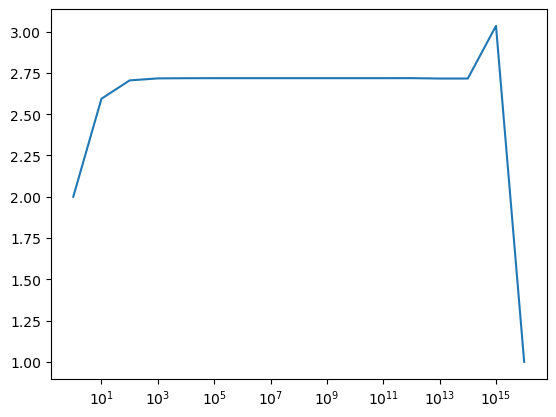

In [26]:
def f(n):
    return (1/n +1)**n
    
for i in range(17):
    print(f(10.0**i))

import matplotlib.pyplot as plt
x=[10.0**i for i in range(17)]
y=[f(10.0**i) for i in range(17)]
plt.semilogx(x,y)